In [2]:
from pref_extract import find_restaurants, extract_all_preferences, extract_preference
import pandas as pd
import configparser
import time

21676
1297


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Buka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Epoch 1/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.9927 - val_accuracy: 0.8076 - val_loss: 1.3284
Epoch 2/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9641 - loss: 0.1293 - val_accuracy: 0.8084 - val_loss: 1.6539
Epoch 3/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9792 - loss: 0.0770 - val_accuracy: 0.8060 - val_loss: 1.8386
Epoch 4/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9855 - loss: 0.0585 - val_accuracy: 0.8084 - val_loss: 1.9951
Epoch 5/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9878 - loss: 0.0471 - val_accuracy: 0.8076 - val_loss: 2.1189
Epoch 6/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9883 - loss: 0.0440 - val_accuracy: 0.8084 - val_loss: 2.2175
Epoch 7/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9903 - loss: 0.0368 - val_accuracy: 0.8071 - val_loss: 2.3014
Epoch 8/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0350 - val_accuracy: 0.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Buka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Epoch 1/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 1.0148 - val_accuracy: 0.8065 - val_loss: 1.2964
Epoch 2/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9664 - loss: 0.1181 - val_accuracy: 0.8065 - val_loss: 1.6112
Epoch 3/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9797 - loss: 0.0776 - val_accuracy: 0.8076 - val_loss: 1.7992
Epoch 4/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9849 - loss: 0.0602 - val_accuracy: 0.8071 - val_loss: 1.9757
Epoch 5/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9874 - loss: 0.0490 - val_accuracy: 0.8078 - val_loss: 2.0382
Epoch 6/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9897 - loss: 0.0407 - val_accuracy: 0.8092 - val_loss: 2.1089
Epoch 7/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9891 - loss: 0.0387 - val_accuracy: 0.8076 - val_loss: 2.1842
Epoch 8/12
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9914 - loss: 0.0341 - val_accuracy: 0.

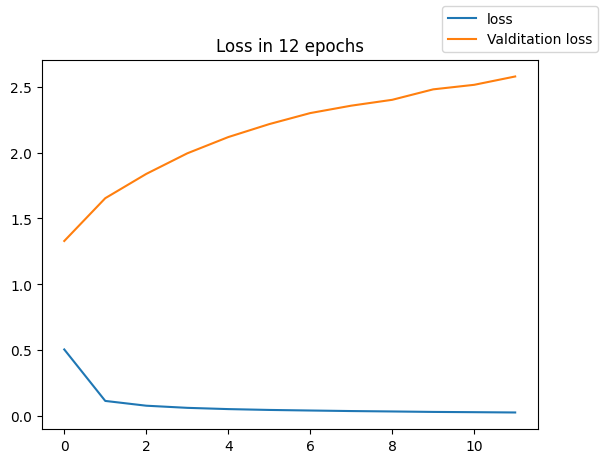

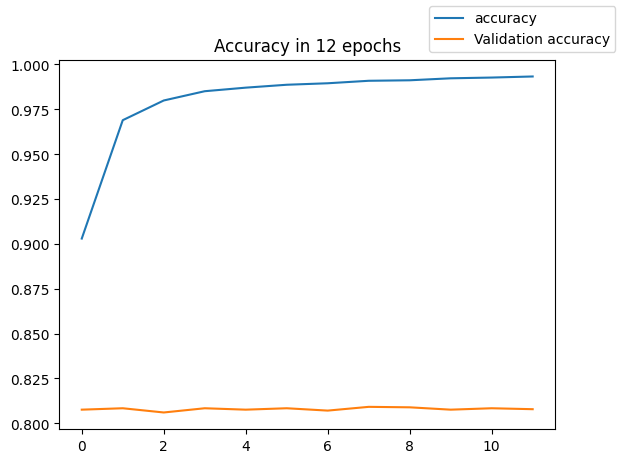

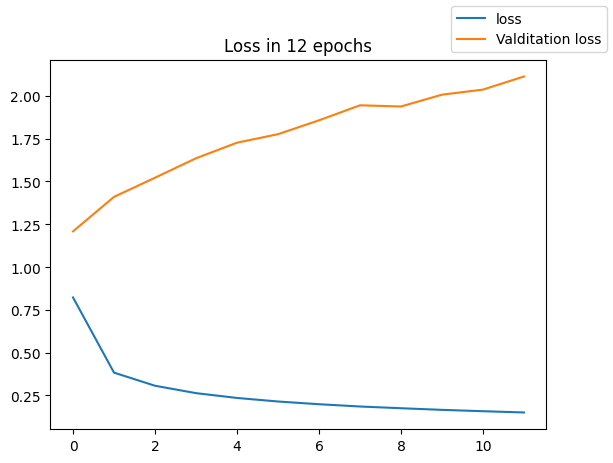

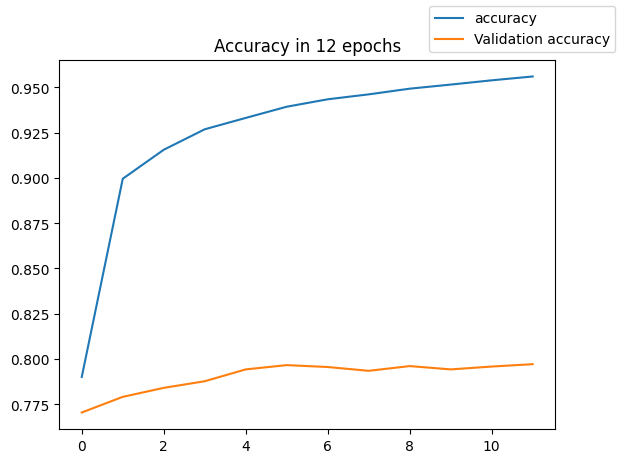

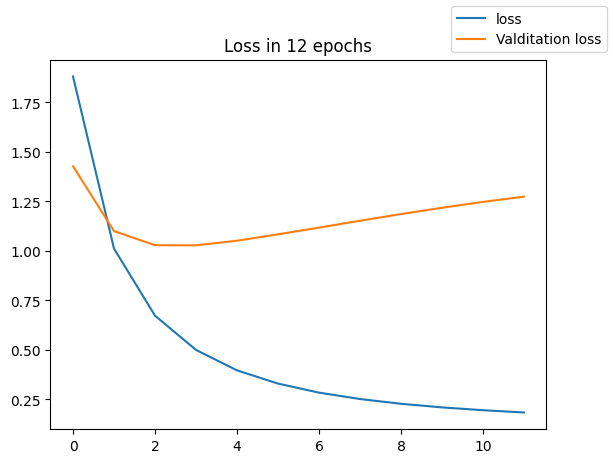

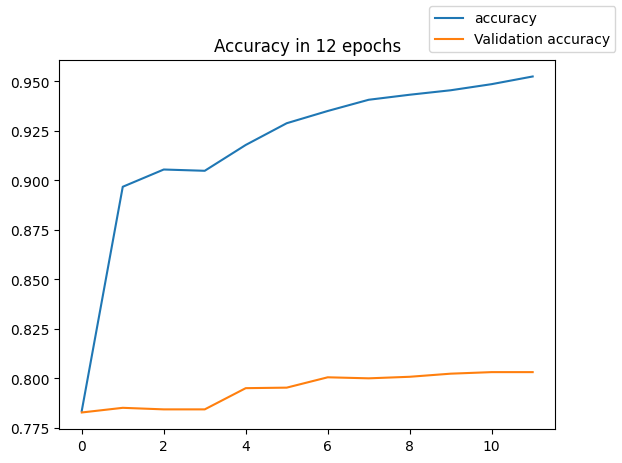

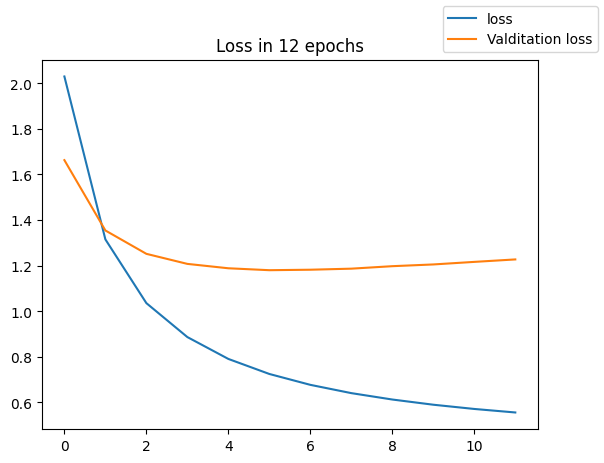

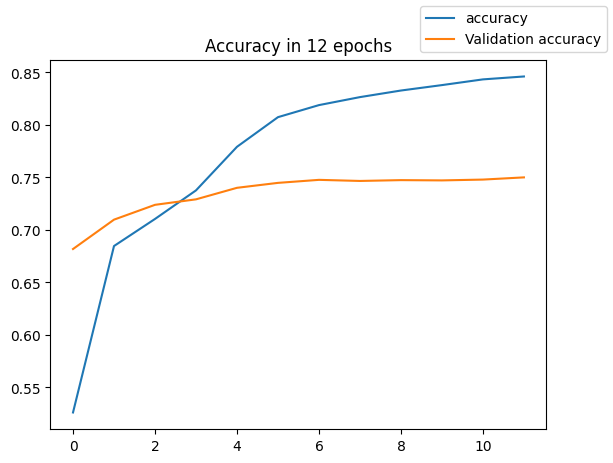

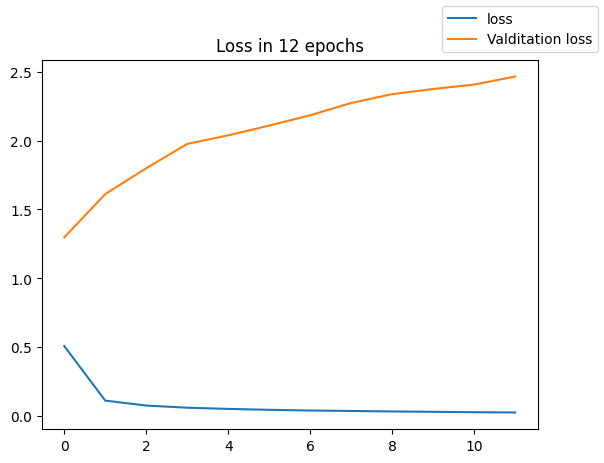

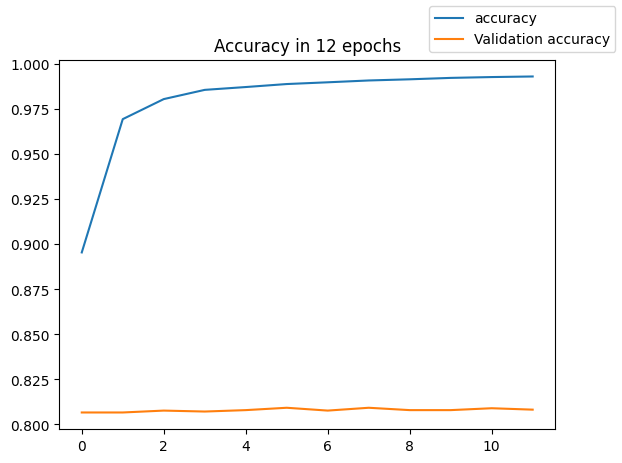

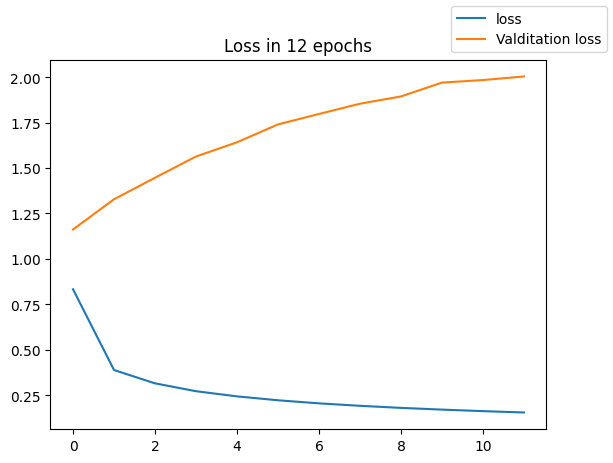

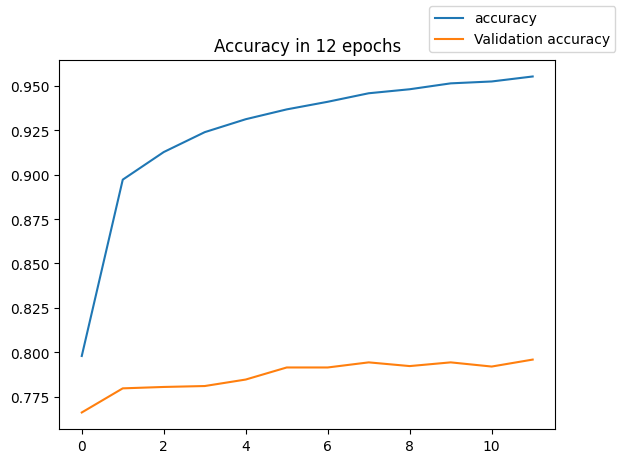

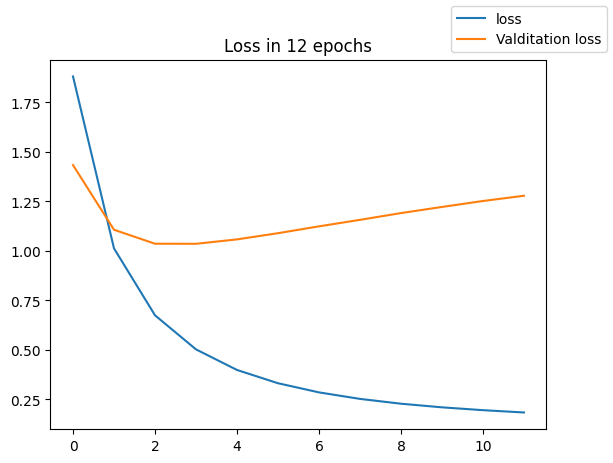

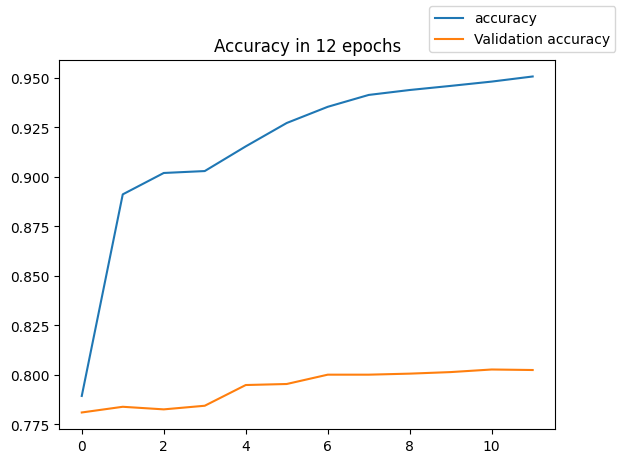

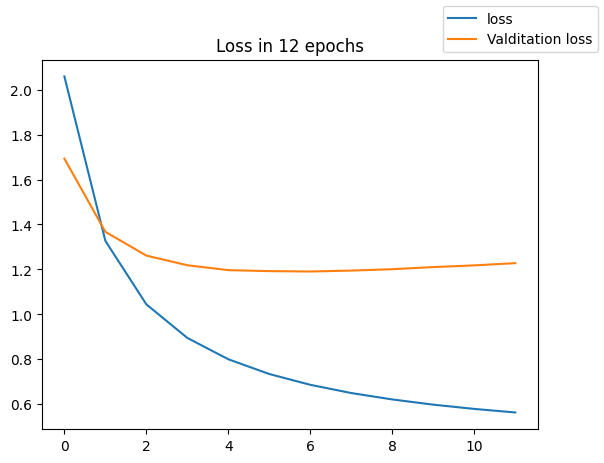

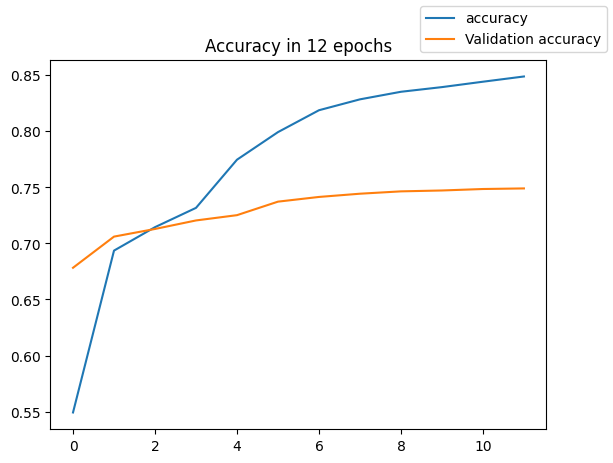

In [4]:
import importlib
import baseline
importlib.reload(baseline)
from baseline import prediction 

In [5]:
import regex as re
restaurant_info = pd.read_csv('data/restaurant_info.csv')

In [4]:
# Possible state transitions, not used, only to look at
# state_transition_possibilities = {
#     1: [2, 9],          
#     2: [2, 3, 9],
#     3: [3, 4, 9],
#     4: [4, 5, 9],
#     5: [6, 7, 9],
#     6: [5, 9],
#     7: [5, 8, 9],
#     8: [8, 9]
# }

In [6]:
class StateMachine:
    def __init__(self, restaurant_info):

        self.configParser = configparser.ConfigParser()
        self.filename = "config.ini"
        self.configParser.read(self.filename)
        self.setting = self.configParser.sections()
        self.delay = self.configParser[self.setting[0]].getfloat('delay')
        self.if_caps = self.configParser[self.setting[1]].getboolean('caps')
        self.style = self.configParser[self.setting[1]]['style']
        self.if_restart = self.configParser[self.setting[1]].getboolean('restart')

        self.state = 1
        self.preferences = {
            'food_type': None,
            'area': None,
            'price': None
        }
        self.restaurant_info = restaurant_info
        self.restaurants_options = pd.DataFrame()
        self.selected_rest = ""
        self.restaurant_name = ""
        self.area = ""
        self.price = ""
        self.food_type = ""
        self.request_answer = ""
        self.requested_info = ""
        self.input_text = ""
        self.synonyms = {
            'area': ["area", "location", "part", "zone","sector","district"],
            'food_type': ["food", "type", "kitchen", "food type","cuisine","taste"],
            'price': ["price", "costs", "luxury", "amount","costs"]
        }
        # TODO - add more messages
        if(self.style == 'informal'):
            self.message_dict = {
                1: "Yo! This is FeastFinder, the best way to find a restaurant for you and your hommies. Let me know what do you crave, where, and how expensive.",
                2: "In what hood do you want to eat?",
                3: "What type of food are you looking for?",
                4: "How expensive should it be?",
                5: 'Looking for a perfect spot...',
                6: "Sorry, no such place in my database. We can try to look for something else, give me deifferent preferences.",
                7: f'{self.restaurant_name} is in {self.area} and is a {self.price} {self.food_type}. Does it sounds good?',
                8: f'{self.requested_info} of {self.restaurant_name} is {self.request_answer}',
                9: "Have a great one. Peace!",
                10: f"I have a different one for you. What about {self.restaurant_name}",
                11: "That is not what I expected"
            }
        else:
            self.message_dict = {
                1: "Welcome to FeastFinder, I will help find you a restaurant. Please tell what type of food would you like to eat, where, and in what price range.",
                2: "In what area do you want to have dinner?",
                3: "What cuisine are you looking for?",
                4: "In what price range should the restaurant be?",
                5: 'Looking for a restaurant...',
                6: "I'm sorry, I don't see any restaurants matching your preferences in my database. Try providing different preferences.",
                7: f'{self.restaurant_name} is located in the {self.area} and is a {self.price} {self.food_type} restaurant. Does this sound good?',
                8: f'{self.requested_info} of {self.restaurant_name} is {self.request_answer}',
                9: "I hope you'll have a great time. Bye bye!",
                10: f"That is unfortunate. What do you think of {self.restaurant_name}",
                11: "That is not what I expected"
            }
        
        if(self.if_caps):
            print(self.message_dict[self.state].upper())

        else:
            print(self.message_dict[self.state])
        if self.if_restart == True:
            print('To start over, just type \'reset\'.')
        utterance = input()
        self.change_state(utterance)
        

    def pattern_recog(self, utterance):
        """
        We recognize the pattern "any X". It returns X. It returns a list of all instances of X
        """
        matches = re.findall(r'\bany\b\s+(\w+)', utterance)
        if matches:
            return matches
        else:
            return None
        
    def update_dict(self, old: dict, new: dict) -> dict:
        old.update( (k,v) for k,v in new.items() if v is not None)
        return old

    def any_update(self, words_after_any: list, orig_words: list):
        for word in words_after_any:
            for orig_word in orig_words: 
                if extract_preference(word, self.synonyms[orig_word], 2):
                    self.preferences = self.update_dict(self.preferences, {orig_word: "any"})

    def change_state(self, utterance = None):
        next_state, if_message = self.predict_next_state(utterance)
        if if_message:
            if(self.if_caps):
                time.sleep(self.delay)
                print(self.message_dict[next_state].upper())
            else:
                time.sleep(self.delay)
                print(self.message_dict[next_state])
            utterance = input()
            self.state = next_state
            self.change_state(utterance)
        else:
            self.state = next_state
            self.change_state(utterance)

    def predict_next_state(self, utterance = None) -> tuple[int, bool]:
        """
        If the state should send a message, and then wait for user answer,
        it returns 'True'. If not, eg. state 2->4, returns False.
        :param utterance: 
        :return: tuple(next state number, if message sent) 
        """
        category = ""
        if self.if_restart == True:
            if utterance == 'reset':
                return 1, True        
        if utterance != None:
            category = prediction([utterance])
        if category == 'thankyou':
            return 9, True

        
        if self.state == 1:
            if utterance != None:
                self.preferences = extract_all_preferences(utterance)
            return 2, False
        
        if self.state == 2:
            self.preferences = self.update_dict(self.preferences, extract_all_preferences(utterance))
            if self.pattern_recog(utterance) != None:
                self.any_update( self.pattern_recog(utterance), ["area"])
            if self.preferences['area'] is None:
                return 2, True
            else:
                return 3, False
            
        if self.state == 3:
            self.preferences = self.update_dict(self.preferences, extract_all_preferences(utterance))
            if self.pattern_recog(utterance) != None:
                self.any_update( self.pattern_recog(utterance), ["food_type"])
            if self.preferences['food_type'] is None:
                return 3, True
            else:
                return 4, False
            
        if self.state == 4:
            self.preferences = self.update_dict(self.preferences, extract_all_preferences(utterance))
            if self.pattern_recog(utterance) != None:
                self.any_update( self.pattern_recog(utterance), ["price"])
            if self.preferences['price'] is None:
                return 4, True
            else:
                return 5, False
        
        if self.state == 5:
            print("pref: ", self.preferences)
            self.restaurants_options = find_restaurants(restaurant_info, self.preferences)
            if (self.restaurants_options.empty):
                return 6, True
            else:
                self.get_restaurant()
                message = f'{self.restaurant_name} is located in {self.area} and is a {self.price} {self.food_type}. Does it sound good?'
                self.message_dict[7] = message 
                return 7, True
        
        if self.state == 6:
            self.preferences = self.update_dict(self.preferences, extract_all_preferences(utterance))
            if self.pattern_recog(utterance) != None:
                self.any_update( self.pattern_recog(utterance), ["price"])
            self.restaurants_options = find_restaurants(self.restaurant_info, self.preferences)
            return 5, False
            
        if self.state == 7:
            # TODO - category prediction, now - hardcoded category
            # category = predict(utterance)
            # category = 'request' / 'reqalts'
            if category == 'request':
                return 8, False
            if category == 'regalts':
                return 5, False
            if category == "affirm":
                return 9, False
            if category == "negate":
                return 10, False
            else:
                return 11, False
            # TODO: what happens else?
            #return ???
            
        if self.state == 8:
            # TODO bug fixing (phone) text not displayed
            message = ""
            request_dict = {
                'food': ["type", "food"],
                'phone': ["phone", "number"],
                'addr': ["adress", "location"],
                'postcode': ["postal", "postcode"]
             }
            for key, item in request_dict.items():
                if extract_preference(utterance, item, 2) != None:
                    if key == "food":
                        key_name = "cuisine"
                    elif key == "phone":
                        key_name = "phone number"
                    elif key == "addr":
                        key_name = "location"
                    elif key == "postcode":
                        key_name = "postal code"

                    message = message + f"The {key_name} of {self.restaurant_name} is {self.selected_rest[key].values[0]} \n"
            
            self.message_dict[8] = message
            return 8, True
        
        if self.state == 9:
            # TODO - its basically end of dialog
            return 9, True
        
        if self.state == 10:
            if self.restaurants_options.empty:
                return 6, True
            self.get_restaurant()
            message1 = f"That is unfortunate. Does {self.restaurant_name} sound good?"
            self.message_dict[7] = message1
            return 7, True

    def get_restaurant(self):
        rest = self.restaurants_options.sample()
        self.selected_rest = rest
        self.restaurant_name =rest["restaurantname"].values[0]
        self.area = rest["area"].values[0]
        self.price = rest["pricerange"].values[0]
        self.food_type = rest["food"].values[0]
        self.restaurants_options = self.restaurants_options.drop(rest.index)
           
SM = StateMachine(restaurant_info)

print("hello")

YO! THIS IS FEASTFINDER, THE BEST WAY TO FIND A RESTAURANT FOR YOU AND YOUR HOMMIES. LET ME KNOW WHAT DO YOU CRAVE, WHERE, AND HOW EXPENSIVE
IN WHAT HOOD DO YOU WANT TO EAT?
YO! THIS IS FEASTFINDER, THE BEST WAY TO FIND A RESTAURANT FOR YOU AND YOUR HOMMIES. LET ME KNOW WHAT DO YOU CRAVE, WHERE, AND HOW EXPENSIVE
IN WHAT HOOD DO YOU WANT TO EAT?
WHAT TYPE OF FOOD ARE YOU LOOKING FOR?
HOW EXPENSIVE SHOULD IT BE?
pref:  {'food_type': 'chinese', 'area': 'centre', 'price': 'cheap'}
CHARLIE CHAN IS LOCATED IN CENTRE AND IS A CHEAP CHINESE. DOES IT SOUND GOOD?
SORRY, NO SUCH PLACE IN MY DATABASE. WE CAN TRY TO LOOK FOR SOMETHING ELSE, GIVE ME DEIFFERENT PREFERENCES.
YO! THIS IS FEASTFINDER, THE BEST WAY TO FIND A RESTAURANT FOR YOU AND YOUR HOMMIES. LET ME KNOW WHAT DO YOU CRAVE, WHERE, AND HOW EXPENSIVE
IN WHAT HOOD DO YOU WANT TO EAT?
IN WHAT HOOD DO YOU WANT TO EAT?
HAVE A GREAT ONE. PEACE!
